In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('sample_data/mnist_train_small.csv',header = None)
X_train = np.array(df.iloc[:,1:])
y_train = np.array(df.iloc[:,0:1])
df1 = pd.read_csv('sample_data/mnist_test.csv',header = None)
X_test = np.array(df.iloc[:,1:])
y_test = np.array(df.iloc[:,0:1])

In [24]:
class NeuralNetwork:

  def __init__(self, alpha=0.005, lam=0.01, num_iters=50 ,s1=16):
    self.alpha = alpha
    self.lam = lam
    self.num_iters = num_iters
    self.s1 = s1

  def sigmoid(self,z):
    return 1/(1 + np.exp(-1*z))

  def scale(self, X):
    m, n = X.shape
    for i in range(n):
      X[:,i] = (X[:,i] - np.mean(X[:,i])) / (np.std(X[:,i]) + 0.0000001)
    return X

  def add_bias(self,b):
    return np.hstack((np.ones((len(b),1)),b))

  def fit(self, X, y, n_cls):
    
    # Feature Scaling
    X = self.scale(X)
    X = self.add_bias(X)    # Adding bias colunmn
    m, n = X.shape

    # Coverting y matrix for One vs all classification
    self.n_cls = n_cls
    y_cls = np.zeros((m,self.n_cls))
    for i in range(m):
      y_cls[i,y[i]] = 1  #20000X10

    # Initializing parameter vectors theta, delta
    self.theta1 = np.random.rand(self.s1,n) #16X785
    self.theta2 = np.random.rand(10,self.s1+1) #10X17
    delta1 = np.zeros_like(self.theta1) #16X785
    delta2 = np.zeros_like(self.theta2) #10X17

    # Initializing some useful variables
    # 'J.history' and 'iters' keeps track of cost with each iteration.
    
    self.J_hist = []
    self.iters = []

    for i in range(self.num_iters):
      # Forward Propogation
      a1 = X
      z2 = a1@self.theta1.T #20000X785*785X16 = 20000X16
      a2 = self.sigmoid(z2) #20000X16
      a2 = self.add_bias(a2) #20000X17
      z3 = a2@self.theta2.T #20000X17*17X10 = 20000X10
      a3 = self.sigmoid(z3)

      # Back Propogation
      # Finding err(Error), delta
      err3 = (a3 - y_cls)  #20000*10
      err2 = (err3@self.theta2)*a2*(1-a2) #20000X10*10X17 .*20000X17  = 20000X17
      delta2 += err3.T@a2  #10X20000*20000X17 = 10X17
      delta1 += err2[:,1:].T@a1  #16X20000*20000X785 = 16X785
      theta1_temp = self.theta1
      theta1_temp[:,0] = 0
      theta2_temp = self.theta2
      theta2_temp[:,0] = 0
      D2 = (1/m)*(delta2 + self.lam*theta2_temp)
      D1 = (1/m)*(delta1 + self.lam*theta1_temp)

      self.theta1 -= self.alpha*(D1)
      self.theta2 -= self.alpha*(D2)

      cost = (-1/m)*np.sum(y_cls*np.log(a3) + (1-y_cls)*np.log(1-a3)) + (self.lam/(2*m))*(np.sum(self.theta1[:,1:]**2) + np.sum(self.theta2[:,1:]**2))
      #cost = (-1/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))        + (self.lam/(2*m))*(np.sum(self.theta[:,1:]**2))

      self.J_hist.append(cost)
      self.iters.append(i)

  def plot(self):
    plt.plot(self.iters,self.J_hist)
    plt.xlabel("Number Of Iterations")
    plt.ylabel("Cost Function")
    plt.title("Cost Function vs Iteration")

In [25]:
a = NeuralNetwork()
a.fit(X_train,y_train,10)

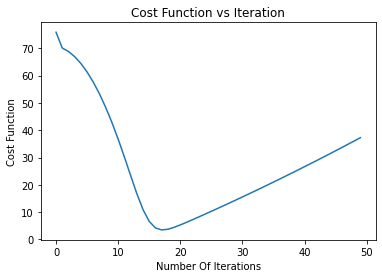

In [26]:
a.plot()